# Project Journal

**Name:** Genna Yavarasi

**Research Question:** How do interactions between sectoral differences (commercial, electric power, industrial, residential, and transportation) and temporal factors (year and month) influence trends in total renewable energy consumption?

**Variables:**  
$Y$: Total Renewable Energy  
$X_1$: Year  
$X_2$: Month  
$X_3$: Sector 


## Data Prep & EDA
**Dates:** November 1 - November 7

**Meeting Date:** November 7

### Data Cleaning Summary

**Summary of data cleaning process:**
1. Install and import libraries
2. Import dataset
3. Check for missing values
4. Create a reduced dataset that contains the important features: Year, Month, and Sector

**Issues Encountered and Resolutions:** Had issues running R code; had to add the Jupyter kernel to the list of trusted kernels in order to run the R code properly.

In [24]:
# Step 1a: Install necessary libraries
install.packages("car")
install.packages("corrplot")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("GGally")
install.packages("reshape2")
install.packages("zoo")

# Step 1b: Import necessary libraries
library(car)
library(corrplot)
library(dplyr)
library(ggplot2)
library(GGally)
library(lmtest)
library(reshape2)

Warning message:
"package 'car' is in use and will not be installed"
Warning message:
"package 'corrplot' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'GGally' is in use and will not be installed"
Warning message:
"package 'reshape2' is in use and will not be installed"
Warning message:
"package 'zoo' is in use and will not be installed"


In [ ]:
# Step 2: Import the data set
data <- read.csv("C:\\Users\\gyava\\Renewable-Energy-Project\\USRenewableEnergyConsumption.csv")

     Year Month         Sector Hydroelectric.Power Geothermal.Energy
1    1973     1     Commerical               0.000             0.000
2    1973     1 Electric Power               0.000             0.490
3    1973     1     Industrial               1.040             0.000
4    1973     1    Residential               0.000             0.000
5    1973     1 Transportation               0.000             0.000
6    1973     2     Commerical               0.000             0.000
7    1973     2 Electric Power               0.000             0.448
8    1973     2     Industrial               0.962             0.000
9    1973     2    Residential               0.000             0.000
10   1973     2 Transportation               0.000             0.000
11   1973     3     Commerical               0.000             0.000
12   1973     3 Electric Power               0.000             0.464
13   1973     3     Industrial               1.064             0.000
14   1973     3    Residential    

In [26]:
# Step 3: Check for missing values
missing_values <- colSums(is.na(data))

# Verify the count for missing values in each column is 0
print(missing_values)

                              Year                              Month 
                                 0                                  0 
                            Sector                Hydroelectric.Power 
                                 0                                  0 
                 Geothermal.Energy                       Solar.Energy 
                                 0                                  0 
                       Wind.Energy                        Wood.Energy 
                                 0                                  0 
                      Waste.Energy Fuel.Ethanol..Excluding.Denaturant 
                                 0                                  0 
    Biomass.Losses.and.Co.products                     Biomass.Energy 
                                 0                                  0 
            Total.Renewable.Energy              Renewable.Diesel.Fuel 
                                 0                                  0 
      

In [27]:
# Step 4: Generate a reduced dataset with only the relevant featres
reduced_data <- data %>%
    select(Month = Month,
           Year = Year,
           Sector = Sector,
           Total.Renewable.Energy = Total.Renewable.Energy)
print(reduced_data)


     Month Year         Sector Total.Renewable.Energy
1        1 1973     Commerical                  0.570
2        1 1973 Electric Power                 89.223
3        1 1973     Industrial                 99.973
4        1 1973    Residential                 30.074
5        1 1973 Transportation                  0.000
6        2 1973     Commerical                  0.515
7        2 1973 Electric Power                 79.331
8        2 1973     Industrial                 90.320
9        2 1973    Residential                 27.164
10       2 1973 Transportation                  0.000
11       3 1973     Commerical                  0.570
12       3 1973 Electric Power                 88.046
13       3 1973     Industrial                 99.997
14       3 1973    Residential                 30.074
15       3 1973 Transportation                  0.000
16       4 1973     Commerical                  0.551
17       4 1973 Electric Power                 82.917
18       4 1973     Industri

### Exploratory Data Analysis Findings
**Key Visualizations:** 

In [ ]:
# Correlation Matrix:
correlation_matrix <- cor(reduced_data %>% select(Year, Month, Total.Renewable.Energy))
print(correlation_matrix)

                               Year        Month Total.Renewable.Energy
Year                    1.000000000 -0.004569854            0.219211783
Month                  -0.004569854  1.000000000           -0.007371176
Total.Renewable.Energy  0.219211783 -0.007371176            1.000000000


Looking at the correlation matrix, none of the relationships between Month, Year, and the Total Renewable Energy have high correlations, indicating that there are no multicollinearity issue. This reduces the chances of skewed and non-precise estimation coefficents within our dataset and suggests that the p-values will be trustworthly in identigying independent and statistically significant variables.

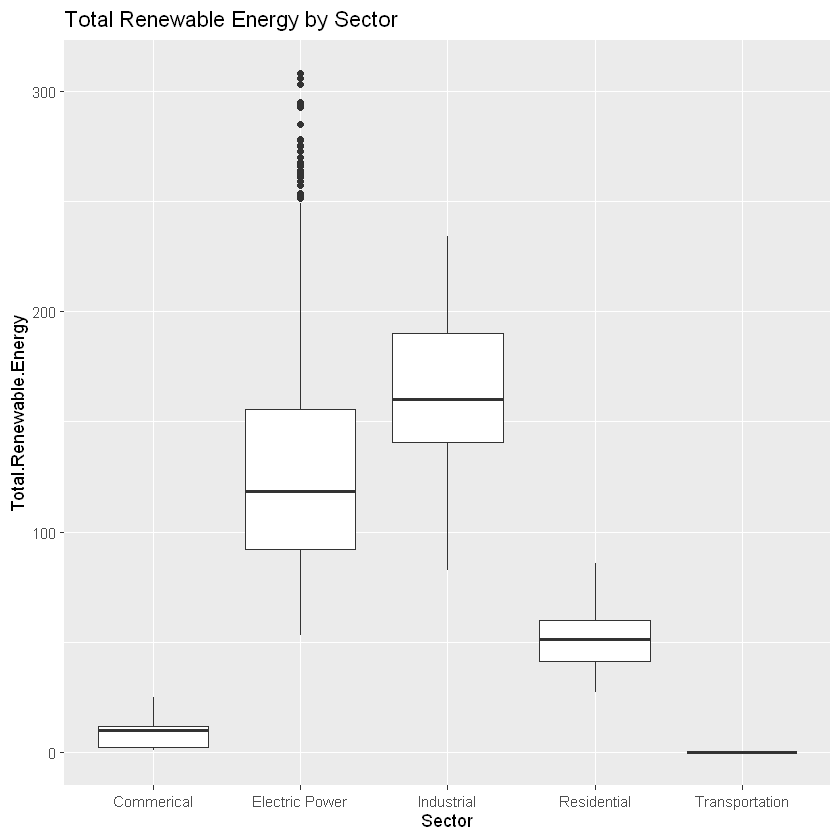

In [29]:
# Boxplot for Total Renewable Energy by Sector
ggplot(reduced_data, aes(x = Sector, y = Total.Renewable.Energy)) +
  geom_boxplot() +
  labs(title = "Total Renewable Energy by Sector")

Within the different types of sectors, there is a variety of skews and data distributions that are demonstrateed through the different shaped box plots in the graph above. 

Commercial: very compact, which suggests the data is all relatively close together. The median of the commercial sector is one of the lowest when comparing all of the sectors, and has one of the smallest ranges, and maximum values.

Electrical Power: normally skewed and has long whiskers, indicating a wide variety in the type of data that is seen. The median is relatively high but the data seems evenly spread within the middle 50% of the data. The upper whisker indicates that there may be multiple outliers within this sector.

Industrial: one of the more normal looking box plots, indicating that the data is evenly distributed throughout the range that is displayed by the graph. The median is the highest median value observed among the sectors, and the range of the data is on the larger side in comparison to sectors like the residential, transportation, and commercial sectors. 

Residential: normally skewed, more condensed and evenly spread throughout it's range. In the middle in terms of the range, no obvious outliers from the whiskers. Average appears in the middle of the data, which supports the idea that the data is more evenly distributed than other sectors.

Transportation: not much information is provided from the graph above, maybe suggesting that the dataset within the transportation sector is not as developed as other sectors, cannot make out the IQR, average, or if it is skewed negatively or positively.

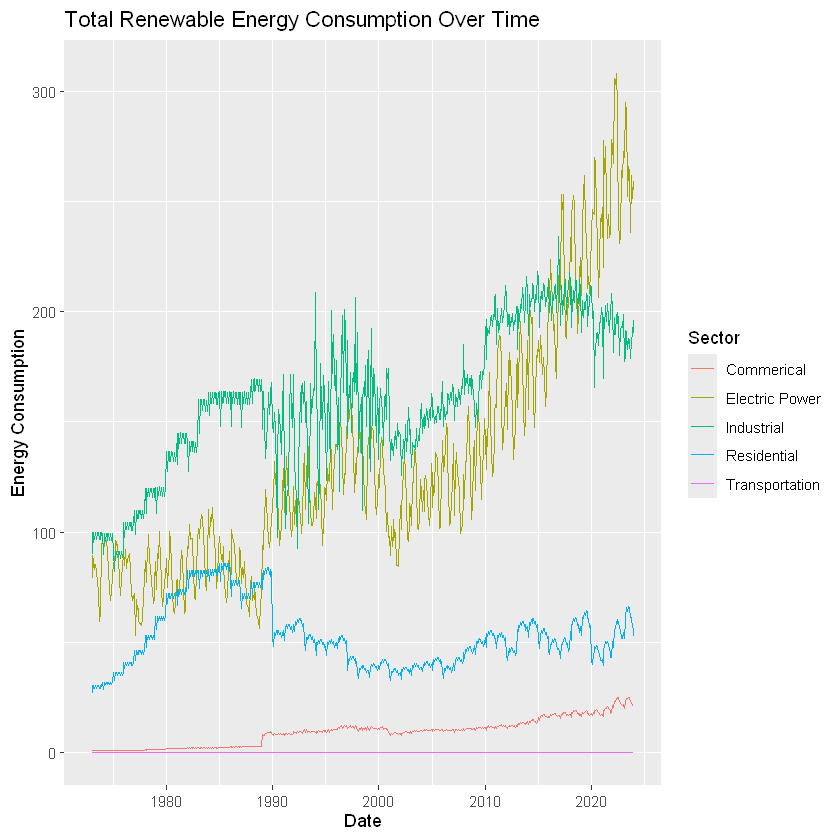

In [30]:
# Line plot for the Total Renewable Energy by sector throughout time
ggplot(reduced_data, aes(x = as.Date(paste(Year, Month, "01", sep = "-")), y = Total.Renewable.Energy, color = Sector)) +
  geom_line() +
  labs(title = "Total Renewable Energy Consumption Over Time", x = "Date", y = "Energy Consumption")

The given line graph demonstrates the energy consumption by sector over the years that are recorded in the dataset. By analyzing the graph, it is possbile to draw several conclusions about the energy consumption levels and how they contribute to the total energy consumption throughout time.

First and foremost, it is clear to see that the electric power and industrial sectors contribute the most to the total energy consumption. Transportation contributes the least amount to the total energy consumption, and the only spike we really see in the transportation sector is in the late 1980s.

The residential sector is the only sector that has seen a significant and noticable decrease in its contribution to the total renewable energy. After seeing a spike in the 1980-1990s, the level of energy consumption has seen a relative decrease and leveled off in the 2010s and 2020s. When analyzing the residential sector in comparison to the industrial, there is a negative correlation, specifically after 2010. 

Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


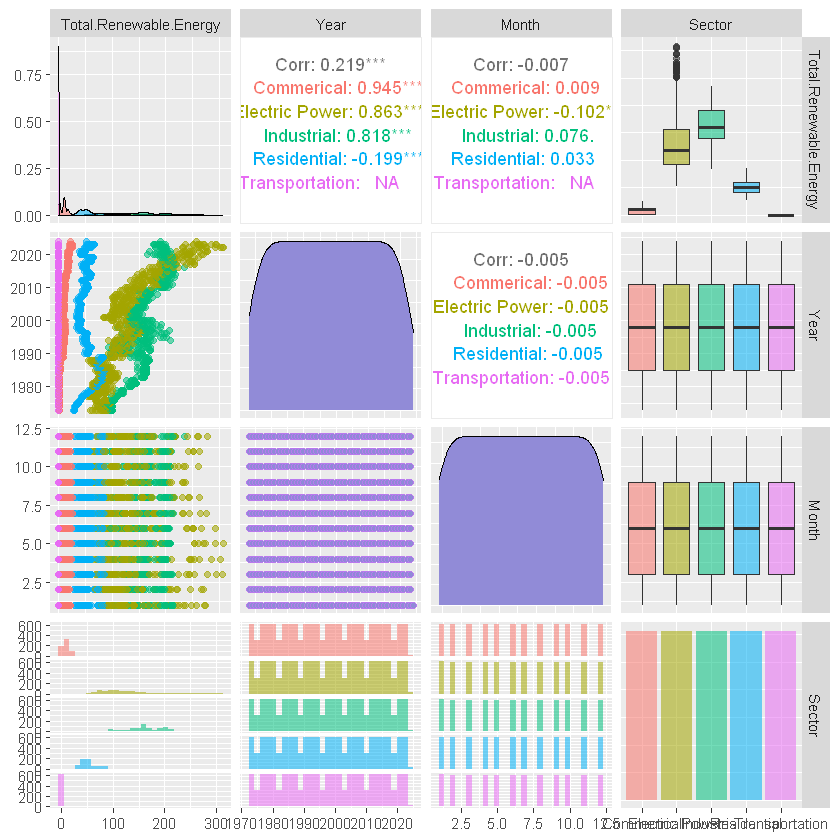

In [44]:
# Pair plot of the Total Renewable Energy by year, month, and the different sectors
ggpairs(reduced_data, columns = c("Total.Renewable.Energy", "Year", "Month", "Sector"),
  aes(color = Sector, alpha = 0.5))

Observations on the Distribution of Data:
- The distribution of Total.Renewable.Energy is highly right skewed, indicating that most values are low and the dataset contains some extreme outliers
- The data covers all years included in the dataset and months uniformly, showing no apparent biases towards specific months and years. This idea is supported by the lack of missing values run earlier in our analysis
- A bar plot shows that some sectors have more data points than others, indicating that some sectors do not have data that goes as far back in time as others (i.e., new energy sources became more relevant during different points in time)

Observations on Data Trends:
- There is a positive correlation between the electrical power and industrial sector, which shows that these two sectors have contributed to the total renewable energy
- Total.Renewable.Energy shows the strongest positive correlation with Year for the electrical power and industrial sector
- The residential sector has a small but negative correlation with Year, which indicates a declining trend in the contribution of the residential sector towards the Total Renewable Energy




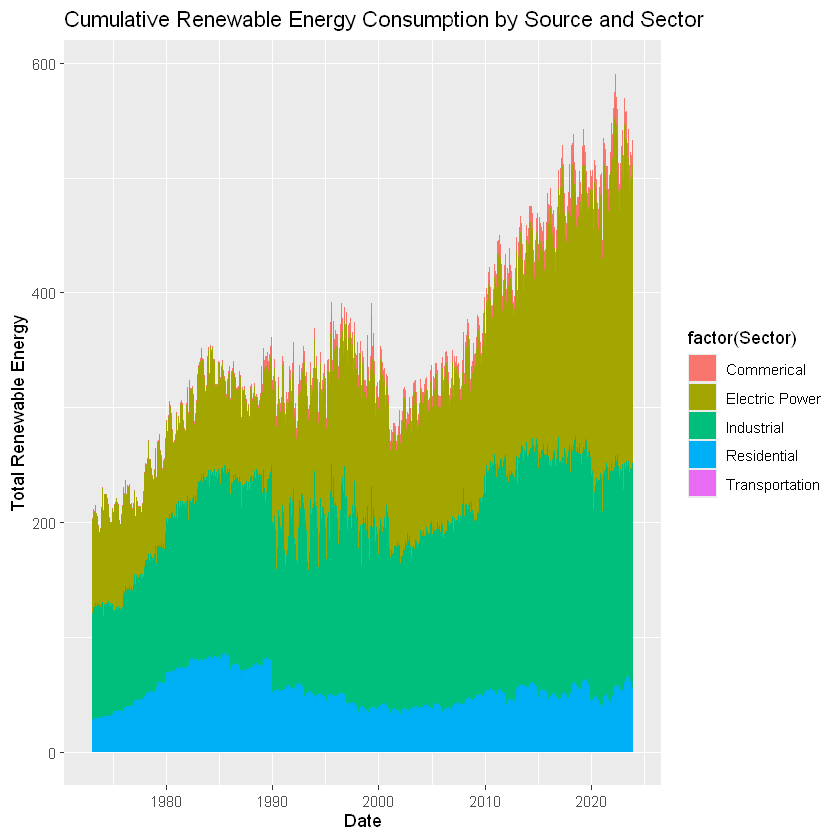

In [32]:
# Stacked area chart to visualize cumulative contribution of different renewable sources
ggplot(reduced_data, aes(x = as.Date(paste(Year, Month, "01", sep="-")), y = Total.Renewable.Energy, fill = factor(Sector))) +
    geom_area() +
    labs(title="Cumulative Renewable Energy Consumption by Source and Sector", x="Date", y="Total Renewable Energy")

The stacked area chart illustrates the cumulative renewable energy consumption across various sectors over time, revealing significant growth from the early 1980s to current. The Electric Power sector is the dominant contributor, accounting for the largest share of renewable energy use, with a steep increase particularly evident from the mid-1990s to today. The Industrial sector follows as the second-largest contributor, displaying steady growth over the years, while the Residential sector maintains a smaller but consistent share. 

In contrast, the Commercial and Transportation sectors contribute minimally, with little apparent growth or variability. 

The overall upward trend in renewable energy consumption suggests a growing reliance on renewables, driven by factors such as technological advancements, policy changes, or shifting economic priorities. Despite periodic dips, the data underscores the increasing integration of renewable energy, particularly in the Electric Power and Industrial sectors, while highlighting opportunities to expand its adoption in underperforming areas like Transportation and Commercial.

### Summary Statistics

In [33]:
# Obtain a summary of the entire dataset
summary(data)

      Year          Month           Sector          Hydroelectric.Power
 Min.   :1973   Min.   : 1.000   Length:3065        Min.   :-0.0020    
 1st Qu.:1985   1st Qu.: 3.000   Class :character   1st Qu.: 0.0000    
 Median :1998   Median : 6.000   Mode  :character   Median : 0.0000    
 Mean   :1998   Mean   : 6.491                      Mean   : 0.1698    
 3rd Qu.:2011   3rd Qu.: 9.000                      3rd Qu.: 0.0360    
 Max.   :2024   Max.   :12.000                      Max.   : 2.0470    
 Geothermal.Energy  Solar.Energy     Wind.Energy       Wood.Energy     
 Min.   :0.000     Min.   : 0.000   Min.   :  0.000   Min.   :  0.000  
 1st Qu.:0.000     1st Qu.: 0.000   1st Qu.:  0.000   1st Qu.:  0.483  
 Median :0.357     Median : 0.004   Median :  0.000   Median : 12.062  
 Mean   :1.146     Mean   : 2.015   Mean   :  4.282   Mean   : 36.644  
 3rd Qu.:1.673     3rd Qu.: 0.774   3rd Qu.:  0.001   3rd Qu.: 51.808  
 Max.   :5.951     Max.   :64.040   Max.   :157.409   Max.   :18

In [34]:
# Obtain a summary of the data based on the sector
data %>%
    group_by(Sector) %>%
    summarize(mean_energy = mean(Total.Renewable.Energy, na.rm = TRUE),
              sd_energy = sd(Total.Renewable.Energy, na.rm = TRUE),
              median_energy = median(Total.Renewable.Energy, na.rm = TRUE),
              min_energy = min(Total.Renewable.Energy, na.rm = TRUE),
              max_energy = max(Total.Renewable.Energy, na.rm = TRUE))

Sector,mean_energy,sd_energy,median_energy,min_energy,max_energy
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Commerical,8.98775,6.116287,9.651,0.515,24.945
Electric Power,132.56947,55.735937,118.269,53.152,308.175
Industrial,159.82539,33.115005,160.159,82.471,234.425
Residential,52.97843,14.564641,50.984,27.164,85.781
Transportation,0.00000,0.000000,0.000,0.000,0.000


***
## Model Building
**Dates:** November 8 - November 14

**Meeting Date:** November 14

### Model Equation

**Equation:** 
$$Y = \beta_0 +  \beta_1X_1 + \beta_2X_2 + + \beta_3X_3 + \epsilon

### Model Fitting

In [35]:
# Model fitting code (e.g., lm() function)
model <- lm(data$Total.Renewable.Energy ~ data$Year + data$Month + data$Sector)
summary(model)


Call:
lm(formula = data$Total.Renewable.Energy ~ data$Year + data$Month + 
    data$Sector)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.442 -16.377  -2.533  12.766 150.059 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -2.104e+03  6.227e+01 -33.796  < 2e-16 ***
data$Year                  1.058e+00  3.116e-02  33.964  < 2e-16 ***
data$Month                -1.312e-01  1.329e-01  -0.987    0.324    
data$SectorElectric Power  1.236e+02  1.453e+00  85.069  < 2e-16 ***
data$SectorIndustrial      1.508e+02  1.453e+00 103.831  < 2e-16 ***
data$SectorResidential     4.399e+01  1.453e+00  30.282  < 2e-16 ***
data$SectorTransportation -8.988e+00  1.453e+00  -6.187 6.95e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.43 on 3058 degrees of freedom
Multiple R-squared:  0.8726,	Adjusted R-squared:  0.8724 
F-statistic:  3492 on 6 and 3058 DF,  p-value: < 2.2e-16


### Multicollinearity

In [36]:
vif_model <- vif(model)
print(vif_model)

                GVIF Df GVIF^(1/(2*Df))
data$Year   1.000021  1         1.00001
data$Month  1.000021  1         1.00001
data$Sector 1.000000  4         1.00000


**Explanation of Multicollinearity:**
A VIF value between 5 and 10 indicates possible multicollinearity issues. 

From the VIF output, all variables have low multicollinearity in the regression model since all values are below the 5-10 threshold. Additionallly, all of the values of the generalized variance inflation factor are close to 1, which indicates negligiel multicollinearity. 

Due to the fact that the predictors do not exhibit multicollinearity problems, they can confidently be included in the regression model without concerns of over-inflating the standard errors.

### Interaction Terms


In [40]:
interaction_model <- lm(Total.Renewable.Energy ~ Year * Month * Sector, data = reduced_data)
summary(interaction_model)


Call:
lm(formula = Total.Renewable.Energy ~ Year * Month * Sector, 
    data = reduced_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-62.122  -4.172   0.000   4.437  94.429 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -7.685e+02  1.891e+02  -4.064 4.94e-05 ***
Year                             3.891e-01  9.463e-02   4.111 4.04e-05 ***
Month                           -7.865e-01  2.576e+01  -0.031  0.97564    
SectorElectric Power            -5.872e+03  2.674e+02 -21.957  < 2e-16 ***
SectorIndustrial                -2.664e+03  2.674e+02  -9.961  < 2e-16 ***
SectorResidential                1.221e+03  2.674e+02   4.565 5.18e-06 ***
SectorTransportation             7.685e+02  2.674e+02   2.874  0.00408 ** 
Year:Month                       4.052e-04  1.289e-02   0.031  0.97492    
Year:SectorElectric Power        3.006e+00  1.338e-01  22.460  < 2e-16 ***
Year:SectorIndustrial            1.406e+00  1.3

In [43]:
vif(interaction_model)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



,GVIF,Df,GVIF^(1/(2*Df))
Year,2.244257e+01,1,4.737359
Month,9.135014e+04,1,302.241863
Sector,4.617175e+19,4,287.109157
Year:Month,9.135605e+04,1,302.251632
Year:Sector,4.616208e+19,4,287.101640
Month:Sector,8.813176e+19,4,311.273073
Year:Month:Sector,8.810131e+19,4,311.259627


**Explanation of Interaction Terms:**
The Year interaction stands out as statisticall significant and meaningful, and highlights sector-specific trends over time. However, looking at the Year, Month, and the three-way interaction terms, they do not provie strong explanatory power, as indicated by their low significance and high multicollinearity in the model. 

Significant positive coefficients for sectors like Electric Power and Industrial indicate that these sectors show a strong increasing trend in renewable energy consumption over time. In contrast, sectors like Residential and Transportation have smaller (and even negative) coefficients, indicating weaker or declining year-over-year trends in these sectors.

The analysis of the Year and Month, and it's affects on the total renewalbe energy by sector capturing complex, sector-specific temporal dynamics. Although this interaction is included in the model, the high variance inflation factor (VIF) values suggest significant multicollinearity, making it difficult to interpret this interaction reliably.


### Model Summary and Diagonostics

In [37]:
# Model summary
summary(model)


Call:
lm(formula = data$Total.Renewable.Energy ~ data$Year + data$Month + 
    data$Sector)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.442 -16.377  -2.533  12.766 150.059 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -2.104e+03  6.227e+01 -33.796  < 2e-16 ***
data$Year                  1.058e+00  3.116e-02  33.964  < 2e-16 ***
data$Month                -1.312e-01  1.329e-01  -0.987    0.324    
data$SectorElectric Power  1.236e+02  1.453e+00  85.069  < 2e-16 ***
data$SectorIndustrial      1.508e+02  1.453e+00 103.831  < 2e-16 ***
data$SectorResidential     4.399e+01  1.453e+00  30.282  < 2e-16 ***
data$SectorTransportation -8.988e+00  1.453e+00  -6.187 6.95e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.43 on 3058 degrees of freedom
Multiple R-squared:  0.8726,	Adjusted R-squared:  0.8724 
F-statistic:  3492 on 6 and 3058 DF,  p-value: < 2.2e-16


In [38]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
data$Year,1,7.463615e+05,746361.4853,1153.8667952,7.114965e-215
data$Month,1,6.301283e+02,630.1283,0.9741715,3.237201e-01
data$Sector,4,1.280677e+07,3201693.4820,4949.7835434,0.000000e+00
Residuals,3058,1.978022e+06,646.8350,NA,NA


In [39]:
durbinWatsonTest(model)

 lag Autocorrelation D-W Statistic p-value
   1       0.1513485      1.696749       0
 Alternative hypothesis: rho != 0

### Feature Selection Plan
Describe strategies for reducing the model (if necessary) and rationale.

***
## Model Evaluation & Validation
**Dates:** November 15 - November 21

**Meeting Date:** November 21

### Documentation of Model Adjustments

In [ ]:
# Model adjustments made based on your feature selection plan
# You can add as many code/markdown blocks as you need to show 
# the iterative thought process here as you go. 

Summary of iterative process:
1. First I did this
2. Then I did this because...
3. Then I did this because...

Final Model Equation: 

### Model Evaluation
#### Significance Tests

In [ ]:
# Add your significance test code with outputs here

#### Model Performance Metrics

In [ ]:
# Add your model performance code with outputs here

### Validation Findings

In [ ]:
# Add any validation code here

### Summary of Findings

[Summarize your findings from the model evaluation and validation here. Don't forget to bring it back to your hypothesis and include your final model!]

***
Team Reminder: After this meeting, agree on a report/presentation format and make all of the needed documentation.

***
## Report and Presentation
**Dates:** November 22 - November 26

**Meeting Date:** November 26, 4:30

No code neccesary here (yay)! Use the space below to brainstorm which graphs you want to include in the report and how you want to tell the story of your model!